In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import sklearn.metrics as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import pickle




In [2]:
df=pd.read_csv('BIG MART.csv')

In [3]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


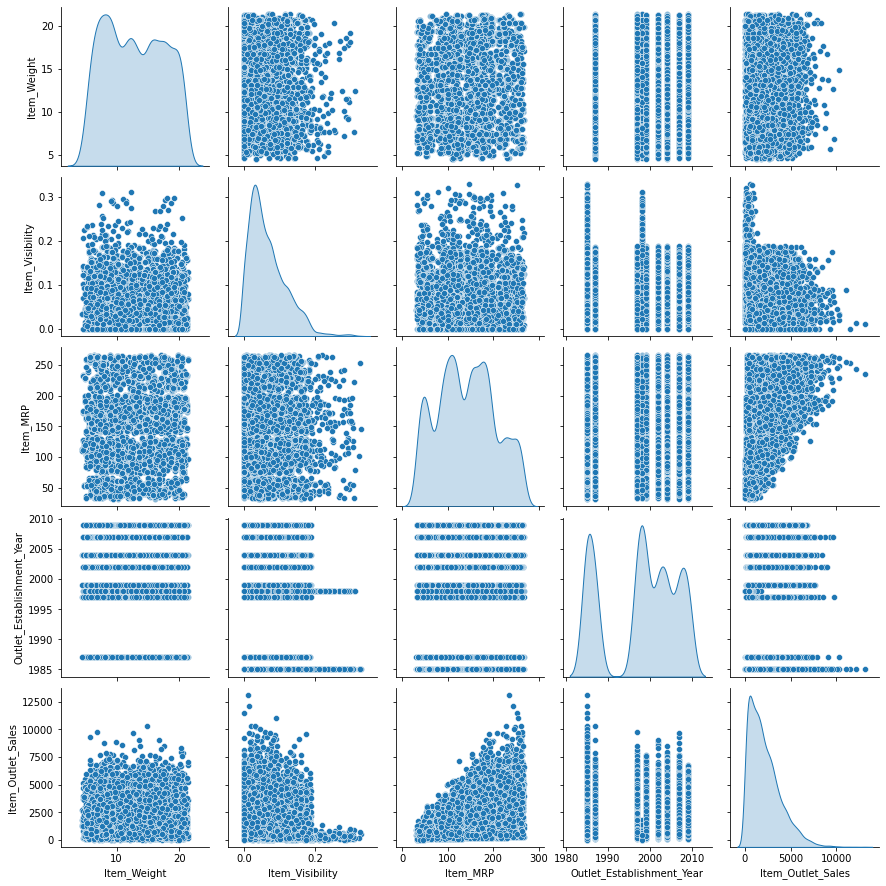

In [6]:
sns.pairplot(data=df, diag_kind='kde')

<AxesSubplot:>

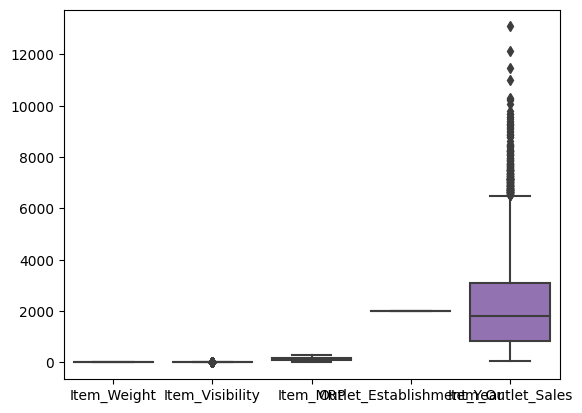

In [7]:
sns.boxplot(data=df)

In [8]:
df['Item_Fat_Content']=df['Item_Fat_Content'].map({'Low Fat':'LOW FAT','Regular':'REGULAR','low fat':'LOW FAT','LF':'LOW FAT','reg':'REGULAR'})

In [9]:
print('UNIQUE VALUES = ',df['Item_Fat_Content'].unique())

print('-------------------------')

print(df.isnull().sum())

UNIQUE VALUES =  ['LOW FAT' 'REGULAR']
-------------------------
Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [31]:
df['Outlet_Size']=df['Outlet_Size'].dropna


In [32]:
df['Outlet_Size']

0       <bound method Series.dropna of 0       Medium\...
1       <bound method Series.dropna of 0       Medium\...
2       <bound method Series.dropna of 0       Medium\...
3       <bound method Series.dropna of 0       Medium\...
4       <bound method Series.dropna of 0       Medium\...
                              ...                        
8518    <bound method Series.dropna of 0       Medium\...
8519    <bound method Series.dropna of 0       Medium\...
8520    <bound method Series.dropna of 0       Medium\...
8521    <bound method Series.dropna of 0       Medium\...
8522    <bound method Series.dropna of 0       Medium\...
Name: Outlet_Size, Length: 8523, dtype: object

In [28]:
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mean())

<AxesSubplot:>

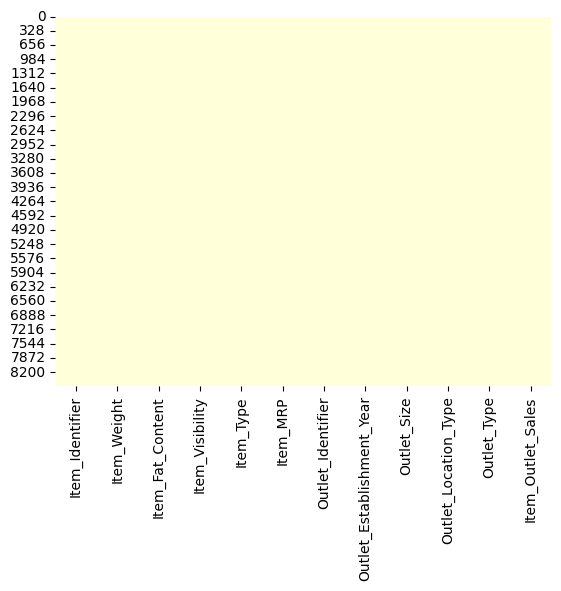

In [33]:
sns.heatmap(df.isnull(), cbar=False, cmap="YlGnBu")

In [12]:
df.groupby('Item_Fat_Content', as_index=False)['Item_Identifier'].count()

,Item_Fat_Content,Item_Identifier
0,LOW FAT,5517
1,REGULAR,3006


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Count'>

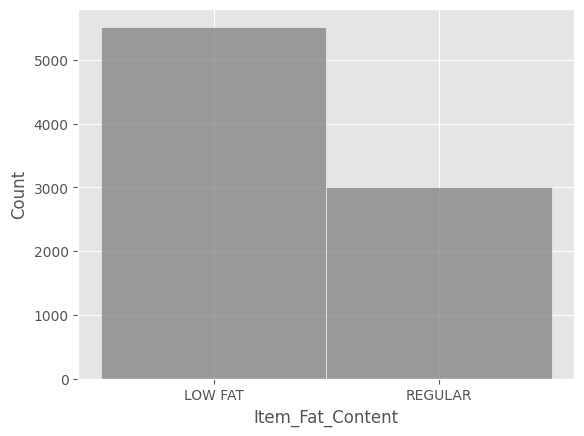

In [138]:
sns.histplot(data=df['Item_Fat_Content'],color='grey')

<AxesSubplot:>

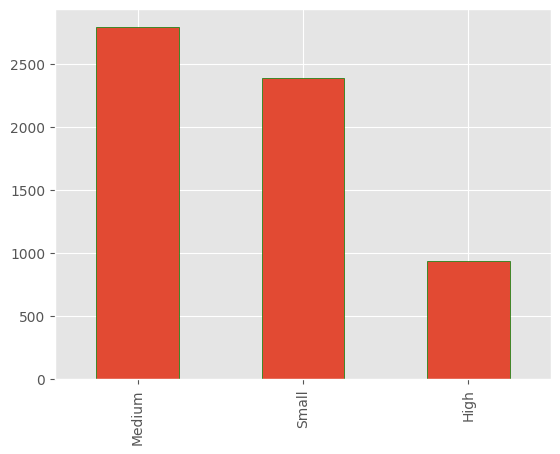

In [139]:
df['Outlet_Size'].value_counts().plot(kind='bar',edgecolor='green')

<AxesSubplot:>

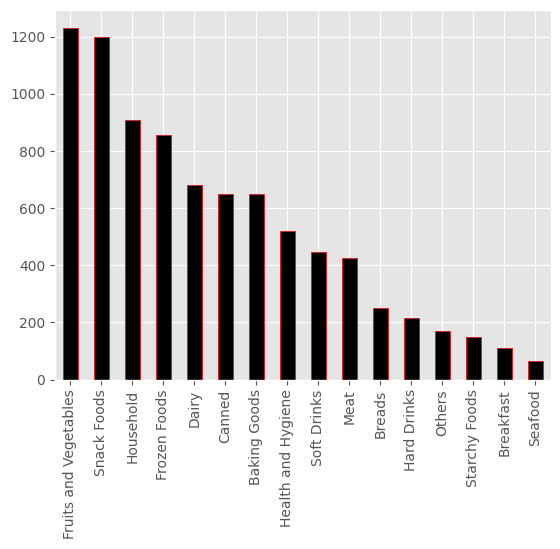

In [140]:
df['Item_Type'].value_counts().plot(kind='bar',edgecolor='red',color='black')

In [141]:
df['Item_Outlet_Sales']=df['Item_Outlet_Sales'].astype('float64')

In [142]:
df['Item_Outlet_Sales']=df['Item_Outlet_Sales'].astype('int')

TOTAL SALES :                   Item_Outlet_Sales
Item_Fat_Content                   
LOW FAT                    11901328
REGULAR                     6685516
-----------------------SALES PER YEAR ----------------------------


array([<AxesSubplot:xlabel='Outlet_Establishment_Year'>,
       <AxesSubplot:xlabel='Outlet_Establishment_Year'>], dtype=object)

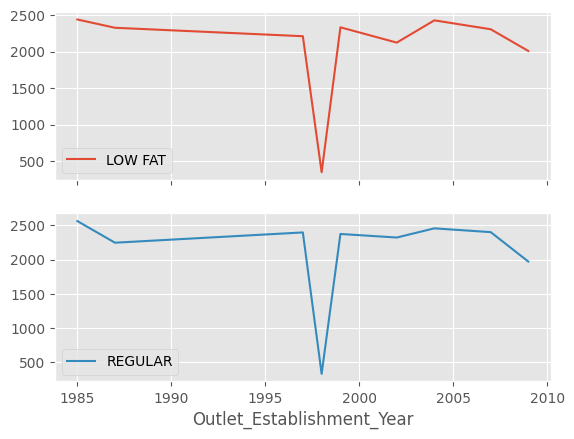

In [143]:
print('TOTAL SALES :',df[['Item_Fat_Content','Item_Outlet_Sales']].groupby('Item_Fat_Content').aggregate({'Item_Outlet_Sales':'sum'}))

print('-----------------------SALES PER YEAR ----------------------------')

pd.pivot_table(df.reset_index(),index=df['Outlet_Establishment_Year'], columns=df['Item_Fat_Content'], values='Item_Outlet_Sales').plot(subplots=True)


In [144]:
df[['Item_Type','Item_Outlet_Sales']].groupby('Item_Type').aggregate({'Item_Outlet_Sales':'sum'}) 

,Item_Outlet_Sales
Item_Type,
Baking Goods,1265198
Breads,553105
Breakfast,232245
Canned,1443824
Dairy,1522268
Frozen Foods,1825296
Fruits and Vegetables,2819435
Hard Drinks,457685
Health and Hygiene,1044938


In [145]:
df[['Outlet_Size','Item_Outlet_Sales']].groupby('Outlet_Size').aggregate({'Item_Outlet_Sales':'sum'}) 

,Item_Outlet_Sales
Outlet_Size,
High,2142201
Medium,7488298
Small,4565014


C:\Users\Taimoor\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

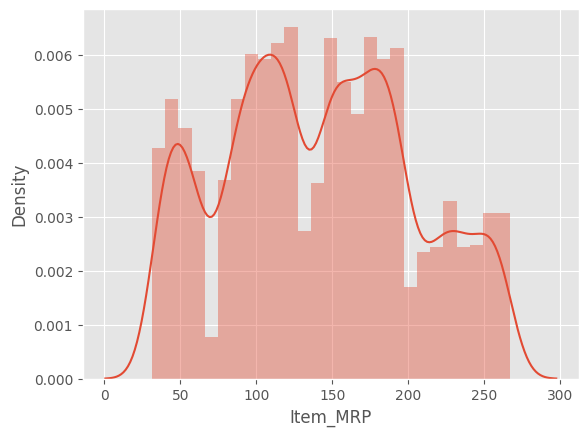

In [146]:
sns.distplot(df['Item_MRP'])

<AxesSubplot:>

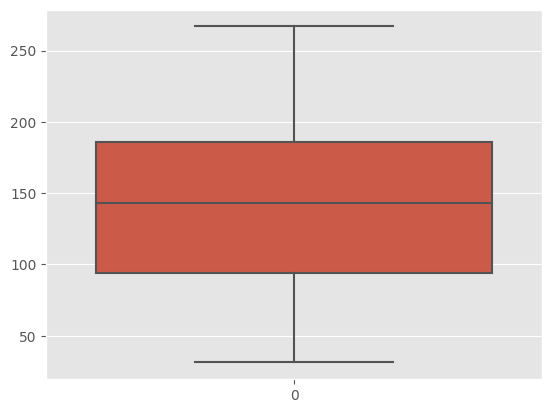

In [147]:
sns.boxplot(data=df['Item_MRP'])

In [148]:
def visualize_sales(column_name):
    result=df.groupby(column_name).sum()
    y=df[column_name].unique()
    plt.style.use('ggplot')
    plt.bar(y,result['Item_Outlet_Sales'])
    plt.xticks(y,rotation='vertical')
    labels,location=plt.yticks() 
    plt.yticks(labels, (labels/1000000).astype(int)) #Scating tn mébtton Use
    plt.ylabel("Sales in milion usd")
    plt.xlabel(column_name,labelpad=20)
    plt.subplots_adjust(left=0.03,
                    bottom=0.03,
                    right=0.9,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.4)
    plt.show()


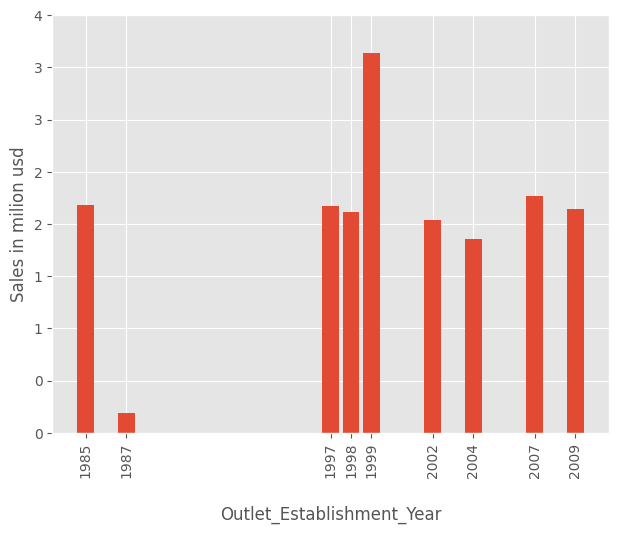

In [149]:
visualize_sales(column_name='Outlet_Establishment_Year')

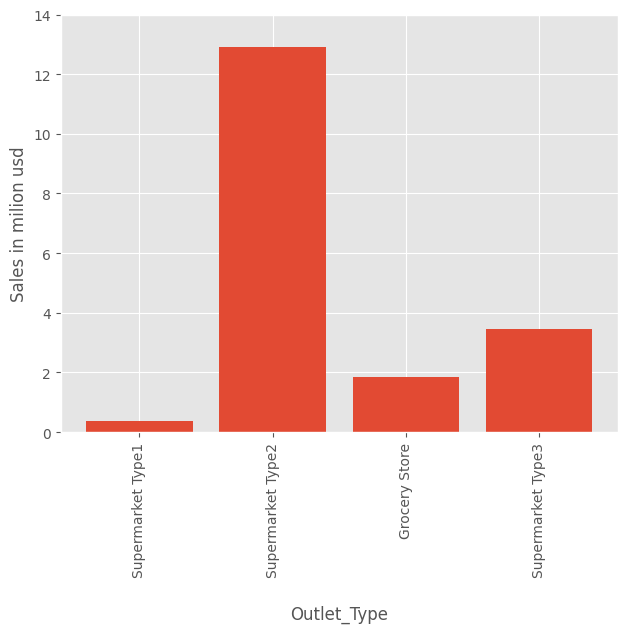

In [150]:
visualize_sales(column_name='Outlet_Type')


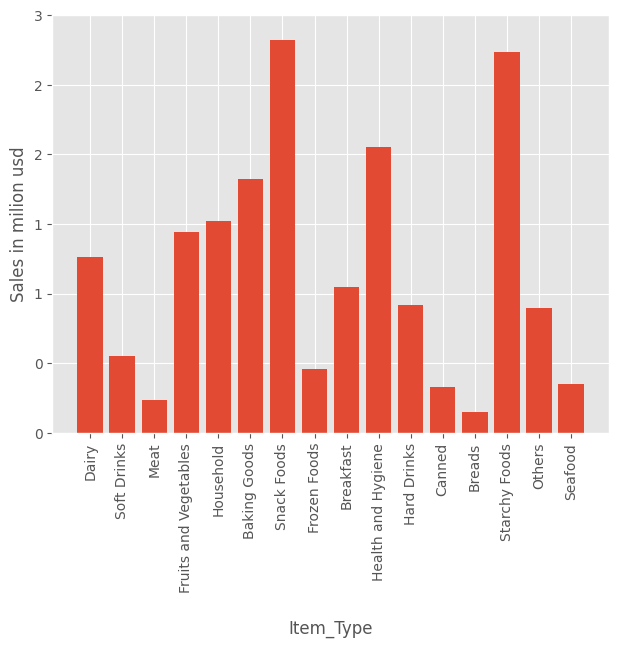

In [151]:
visualize_sales(column_name='Item_Type')

In [152]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014122
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128629
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567577
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049134
Item_Outlet_Sales,0.014122,-0.128629,0.567577,-0.049134,1.000000


In [153]:
df=df.drop(columns=['Outlet_Size','Outlet_Location_Type'],axis=1)

In [154]:
df=df.drop(columns=['Item_Identifier','Outlet_Establishment_Year','Outlet_Establishment_Year'],axis=1) 

In [155]:
df=df.drop(columns=['Outlet_Identifier'],axis=1)

In [156]:
df['Item_Weight']=df['Item_MRP'].astype('float64')
df['Item_Weight']=df['Item_MRP'].astype('int')


In [157]:
le=LabelEncoder()

In [158]:
df_transform=df.apply(le.fit_transform)

In [159]:
df_transform

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Type,Item_Outlet_Sales
0,210,0,664,4,5592,1,2202
1,17,1,880,14,473,2,341
2,104,0,715,10,2901,1,1393
3,145,1,0,6,4227,0,553
4,22,0,0,9,627,1,720
...,...,...,...,...,...,...,...
8518,175,0,3912,13,4955,1,1758
8519,74,1,3278,0,2023,1,424
8520,51,0,2302,8,1263,1,859
8521,69,1,7175,13,1857,2,1237


In [160]:
x = df_transform.drop('Item_Outlet_Sales', axis =1)
y = df_transform.Item_Outlet_Sales

In [194]:


model_params = {
    'Random_Forest': {
        'model': RandomForestRegressor(),
        'params' : {
            'n_estimators': [1,5,10],'max_depth': [5, 6],
            'min_samples_leaf':[1,2]
            
        }
    },
    'Decision Tree' : {
        'model': DecisionTreeRegressor(max_depth=1),
        'params': {
            'max_depth': [2, 3, 5, 10, 20],
            'min_samples_leaf': [5, 10, 20, 50, 100]
            
        }
    }
}

In [199]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x,y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_ = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_

,model,best_score,best_params
0,Random_Forest,0.652459,"{'max_depth': 6, 'min_samples_leaf': 1, 'n_est..."
1,Decision Tree,0.645699,"{'max_depth': 5, 'min_samples_leaf': 50}"


In [163]:
x = df_transform.drop('Item_Outlet_Sales', axis =1)
y = df_transform.Item_Outlet_Sales

In [164]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

print('X train shape: {}'.format(x_train.shape))
print('X test shape: {}'.format(x_test.shape))

print('Y train shape: {}'.format(y_train.shape))
print('Y test shape: {}'.format(y_test.shape))

X train shape: (6392, 6)
X test shape: (2131, 6)
Y train shape: (6392,)
Y test shape: (2131,)


In [165]:
sc=StandardScaler()

In [166]:
X_Train_sc=sc.fit_transform(x_train)
X_Test_sc=sc.transform(x_test)

In [167]:
X_Train_sc

array([[ 1.84544434, -0.7403206 , -0.80643703,  0.41386297,  1.64158541,
         0.98357205],
       [ 0.59829046,  1.35076614, -1.55224385,  1.36613513,  0.70280758,
         0.98357205],
       [ 0.23245866,  1.35076614,  1.5225371 ,  0.65193101,  0.28273421,
        -0.26359965],
       ...,
       [ 1.52949869, -0.7403206 , -1.19439035,  0.17579492,  1.4270925 ,
        -0.26359965],
       [-0.38280392, -0.7403206 ,  0.01085689,  1.36613513, -0.35836787,
        -0.26359965],
       [-0.74863572, -0.7403206 , -1.24581089,  0.41386297, -0.81171438,
        -0.26359965]])

In [ ]:
model=LinearRegression()

In [168]:
model.fit(X_Train_sc,y_train)

LinearRegression()

In [169]:
prediction=model.predict(X_Test_sc)

In [170]:

print("Mean absolute error =", round(sm.mean_absolute_error(y_test, prediction), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, prediction), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, prediction), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, prediction), 2)) 
print("R2 score =", round(sm.r2_score(y_test, prediction), 2))

Mean absolute error = 447.61
Mean squared error = 316373.81
Median absolute error = 381.08
Explain variance score = 0.51
R2 score = 0.51


In [197]:
model_Random = RandomForestRegressor(max_depth=6, n_estimators=1,min_samples_leaf=1)
model_Random.fit(X_Train_sc,y_train)
# Generating predictions over test data
predictions_R = model.predict(X_Test_sc)

In [198]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, predictions_R), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, predictions_R), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, predictions_R), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, predictions_R), 2)) 
print("R2 score =", round(sm.r2_score(y_test, predictions_R), 2))

Mean absolute error = 447.61
Mean squared error = 316373.81
Median absolute error = 381.08
Explain variance score = 0.51
R2 score = 0.51


In [173]:
dt=DecisionTreeRegressor(max_depth=5,min_samples_leaf=50)

In [174]:
dt.fit(X_Train_sc,y_train)
y_pre=dt.predict(X_Test_sc)

In [175]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pre), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pre), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test,y_pre), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pre), 2)) 
print("R2 score =", round(sm.r2_score(y_test,y_pre), 2))

Mean absolute error = 358.18
Mean squared error = 223104.92
Median absolute error = 270.41
Explain variance score = 0.66
R2 score = 0.66


In [205]:
pickle.dump(dt,open('Decision_Tree.pkl','wb'))

In [206]:
pickle.dump(sc,open('Scaling.pkl','wb'))